In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Inputting data

In [136]:
# hormone data, table 9.1 (p. 107)

A = np.array([
    [99, 25.8],
    [152, 20.5],
    [293, 14.3],
    [155, 23.2],
    [196, 20.6],
    [53, 31.1],
    [184, 20.9],
    [171, 20.9],
    [52, 30.4]
]);
y_A = A[:,1]
c_A = np.ones_like(A)
c_A[:,1] = A[:,0]

B = np.array([
    [376, 16.3],
    [385, 11.6],
    [402, 11.8],
    [29, 32.5],
    [76, 32.0],
    [296, 18.0],
    [151, 24.2],
    [177, 26.5],
    [209, 25.8]
]);
y_B = B[:,1]
c_B = np.ones_like(B)
c_B[:,1] = B[:,0]

C = np.array([    
    [119, 28.8],
    [188, 22.0],
    [115, 29.7],
    [88, 28.9],
    [58, 32.8],
    [49, 32.5],
    [150, 25.4],
    [107, 31.7],
    [125, 28.5]
]);

y_C = C[:,1]
c_C = np.ones_like(A)
c_C[:,1] = C[:,0]

y_all = np.hstack((y_A, y_B,y_C))
c_all = np.vstack((c_A, c_B,c_C))

print("A ", np.mean(A,axis=0))
print("B ", np.mean(B,axis=0))
print("C ", np.mean(C,axis=0))

A  [150.55555556  23.07777778]
B  [233.44444444  22.07777778]
C  [111.          28.92222222]


# Plotting Data

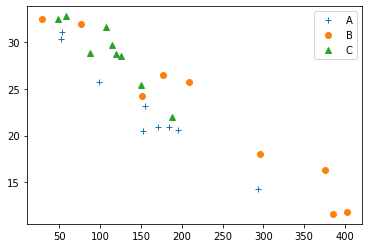

In [70]:
plt.plot(A[:,0],A[:,1],'+', label='A')
plt.plot(B[:,0],B[:,1],'o', label='B')
plt.plot(C[:,0],C[:,1],'^', label='C')
plt.legend()

# Least-Squares Regression

In [140]:
def find_beta_linalg(c_A, y_A):
    CtC = c_A.T.dot(c_A)
    beta_A = np.linalg.inv(CtC).dot(c_A.T.dot(y_A))
    return beta_A


In [125]:
find_beta_linalg(c_A, y_A)

array([33.36005531, -0.06829557])

In [126]:
find_beta_linalg(c_B, y_B)

array([35.22982495, -0.05633909])

In [127]:
find_beta_linalg(c_C, y_C)

array([37.1936709 , -0.07451756])

In [143]:
beta = find_beta_linalg(c_all, y_all)
beta

array([34.17204585, -0.05745123])

# Standard Error

In [181]:
def RSE(c, y, b):
    return np.sum([(yi-ci.dot(b))**2 for yi, ci in zip(y,c)])

def find_Ginv(c_all):
    G = c_all.T.dot(c_all)
    Ginv = np.linalg.inv(G)
    return Ginv

def find_se_hat(c_all, y_all, beta):
    s_f_hat = (RSE(c_all, y_all, beta)/len(y_all))**0.5
    Ginv = find_Ginv(c_all)
    se_b0 = s_f_hat*np.sqrt(Ginv[0,0])
    se_b1 = s_f_hat*np.sqrt(Ginv[1,1])
    return se_b0, se_b1

def find_se_bar(c_all, y_all, beta):
    s_f_bar = (RSE(c_all, y_all, beta)/(len(y_all)-c_all.shape[1]))**0.5
    Ginv = find_Ginv(c_all)
    se_b0 = s_f_bar*np.sqrt(Ginv[0,0])
    se_b1 = s_f_bar*np.sqrt(Ginv[1,1])
    return se_b0, se_b1

In [185]:
seh_b0,seh_b1 = find_se_hat(c_all, y_all, beta)
seb_b0,seb_b1 = find_se_bar(c_all, y_all, beta)
print(f"b0_h = {beta[0]:.2f}")
print(f"b1_h = {beta[1]:.4f}")
print(f"seh_b0 = {seh_b0:.2f}")
print(f"seb_b0 = {seb_b0:.2f}")
print(f"seh_b1 = {seh_b1:.4f}")
print(f"seb_b1 = {seb_b1:.4f}")

b0_h = 34.17
b1_h = -0.0575
seh_b0 = 0.83
seb_b0 = 0.87
seh_b1 = 0.0043
seb_b1 = 0.0045


# Bootstrap the residuals

In [220]:
e = y_all-c_all.dot(beta)

e_star = np.random.choice(e, len(e))
y_star = c_all.dot(beta)+e_star

beta_star = find_beta_linalg(c_all, y_star)

seh_b0,seh_b1 = find_se_hat(c_all, y_star, beta_star)
seb_b0,seb_b1 = find_se_bar(c_all, y_star, beta_star)
print(f"b0_h = {beta_star[0]:.2f}")
print(f"b1_h = {beta_star[1]:.4f}")
print(f"seh_b0 = {seh_b0:.2f}")
print(f"seb_b0 = {seb_b0:.2f}")
print(f"seh_b1 = {seh_b1:.4f}")
print(f"seb_b1 = {seb_b1:.4f}")

b0_h = 34.80
b1_h = -0.0567
seh_b0 = 0.87
seb_b0 = 0.91
seh_b1 = 0.0045
seb_b1 = 0.0047
